In [243]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [244]:
with open('HW0.txt') as H:
  contents=H.read()
  print(contents)

The job requires extra pluck and zeal from every young wage earner.


In [245]:
print(contents.split(' '))

['The', 'job', 'requires', 'extra', 'pluck', 'and', 'zeal', 'from', 'every', 'young', 'wage', 'earner.']


In [246]:
from collections import defaultdict
dic1 = defaultdict(int)
for sentence in contents:
  for letter in sentence:
    letter=letter.lower()
    if letter.isalpha():
      dic1[letter]+= 1
# dic2 = sorted(dic1.items())
dic2 = {k: dic1[k] for k in sorted(dic1.keys())}
print(dic1)
print()
print(dic2)

defaultdict(<class 'int'>, {'t': 2, 'h': 1, 'e': 10, 'j': 1, 'o': 3, 'b': 1, 'r': 7, 'q': 1, 'u': 3, 'i': 1, 's': 1, 'x': 1, 'a': 5, 'p': 1, 'l': 2, 'c': 1, 'k': 1, 'n': 3, 'd': 1, 'z': 1, 'f': 1, 'm': 1, 'v': 1, 'y': 2, 'g': 2, 'w': 1})

{'a': 5, 'b': 1, 'c': 1, 'd': 1, 'e': 10, 'f': 1, 'g': 2, 'h': 1, 'i': 1, 'j': 1, 'k': 1, 'l': 2, 'm': 1, 'n': 3, 'o': 3, 'p': 1, 'q': 1, 'r': 7, 's': 1, 't': 2, 'u': 3, 'v': 1, 'w': 1, 'x': 1, 'y': 2, 'z': 1}


# Histogram

## unnormalized

Text(0.5, 0, 'letter a-z')

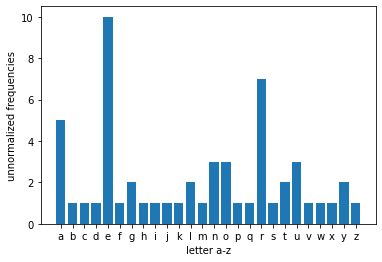

In [247]:
plt.figure(); plt.bar(dic2.keys(), dic2.values())
plt.ylabel('unnormalized frequencies')
plt.xlabel('letter a-z')


## normalized histogram

sum of all values in the normalized hist = 0.9999999999999999


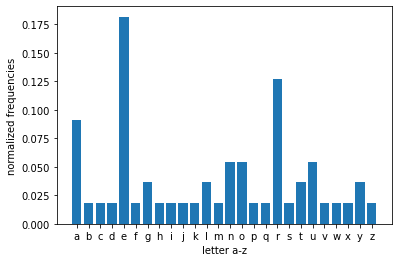

In [248]:
x = list(dic2.keys())
list_vals = list(dic2.values())
sum_values = np.sum(list_vals)
y = [float(v)/sum_values for v in list_vals]
plt.figure(); plt.bar(x, y)
plt.ylabel('normalized frequencies')
plt.xlabel('letter a-z')

print(f'sum of all values in the normalized hist = {np.sum(y)}')

# Question 2

In [249]:
img = cv2.imread('test.png')

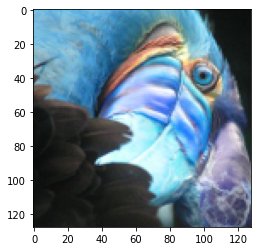

In [250]:
plt.figure(); plt.imshow(img)

In [251]:
np.shape(img)

(128, 128, 3)

In [252]:
p00 = img[0,0,:]

In [253]:
red = [255, 0, 0]
green = [0, 255, 0]
blue = [0, 0, 255]

In [254]:
d_red = p00 - red
d_green = p00 - green
d_blue = p00 - blue

norm_d_red = np.linalg.norm(d_red)
norm_d_green = np.linalg.norm(d_green)
norm_d_blue = np.linalg.norm(d_blue)

print(f'pixel = {p00}, d_red = {d_red}, norm_d_red = {norm_d_red}, {norm_d_green}, {norm_d_blue}')

pixel = [103 180 219], d_red = [-152  180  219], norm_d_red = 321.65975812961125, 253.36732228130762, 210.48752932181043


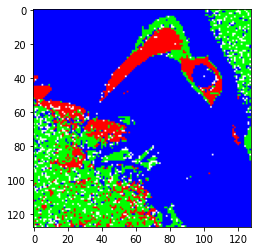

In [255]:
sat_img = np.zeros_like(img)
nrows, ncols = np.shape(img)[0], np.shape(img)[1]
for r in range(nrows):
  for c in range(ncols):
    p = img[r, c, :]

    d_red = p - red
    d_green = p - green
    d_blue = p - blue

    norm_d_red = np.linalg.norm(d_red)
    norm_d_green = np.linalg.norm(d_green)
    norm_d_blue = np.linalg.norm(d_blue)
    d = [norm_d_red, norm_d_green, norm_d_blue]

    if norm_d_blue == norm_d_green == norm_d_blue:
      sat_img[r, c, :] = [255, 255, 255]
    else:
      if min(d) == norm_d_blue:
        sat_img[r, c, :] = blue
      elif min(d) == norm_d_green:
        sat_img[r, c, :] = green
      else:
        sat_img[r, c, :] = red
plt.figure(); plt.imshow(sat_img)
plt.savefig('output1.png')


In [256]:
print(nrows, ncols)

128 128


[64, 64]


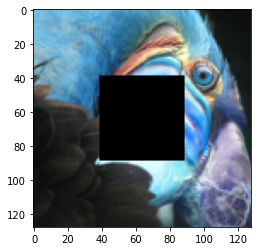

In [257]:
center = [int(nrows/2), int(ncols/2)]
print(center)

img2 = np.copy(img)
img2[center[0] - 25 : center[0] + 25, center[1] - 25 : center[1] + 25, :] = [0, 0, 0]
plt.figure(); plt.imshow(img2)
plt.savefig('output2.png')

In [258]:
a = np.random.rand(5,5)
print(a)

[[0.67439474 0.27314162 0.03255761 0.87428103 0.08553106]
 [0.41659    0.00201961 0.48315683 0.82700143 0.383335  ]
 [0.34326484 0.39517032 0.1920335  0.95263908 0.39391707]
 [0.58287646 0.89499598 0.09722775 0.90677518 0.76148989]
 [0.70959993 0.41075558 0.65538714 0.97645464 0.78648244]]


In [259]:
a[2:5, 1:3] = 0
print(a)

[[0.67439474 0.27314162 0.03255761 0.87428103 0.08553106]
 [0.41659    0.00201961 0.48315683 0.82700143 0.383335  ]
 [0.34326484 0.         0.         0.95263908 0.39391707]
 [0.58287646 0.         0.         0.90677518 0.76148989]
 [0.70959993 0.         0.         0.97645464 0.78648244]]


# Question3

In [260]:
coeff = [
    [3, 3],
    [4, 2],
]

vals = [11.25, 10]
np.linalg.solve(coeff, vals)

array([1.25, 2.5 ])